# Liang's Part

In [2]:
#import dataset
import pandas as pd
data = pd.read_table('AtOnce.txt', header = 0)
data.head()
#check if the time of start date is the same as the date that orders were entered into system
set(data.StartDt) - set(data.SaleOrdDetCreatedDt)
print(len(set(data.StartDt) - set(data.SaleOrdDetCreatedDt)))



85


In [3]:
#convert data type to date time and set it as the index
data['StartDt'] = pd.to_datetime(data['StartDt'])
data.set_index('StartDt', inplace= True)




        
    
    

In [3]:
data.head(5)

,SalesTypeCd,TotalNetPrice,SaleOrdDetCreatedDt,SaleOrdSizeQty,SaleOrdSizeShipQty,CancelledQty,ProductDivision,ReportingBusinessUnit,ERPMasterGender,MarketChannelDesc
StartDt,,,,,,,,,,
2017-05-30,WS,12.0,2017-05-30 00:00:00.000,1,1,0,Apparel,Teamsport,MNS,SPORT SPECIALTY
2017-06-14,WS,12.0,2017-06-14 00:00:00.000,1,1,0,Apparel,Teamsport,MNS,SPORT SPECIALTY
2017-06-22,WS,12.0,2017-06-22 00:00:00.000,1,1,0,Apparel,Teamsport,MNS,SPORT SPECIALTY
2017-01-25,WS,12.0,2017-01-25 00:00:00.000,1,1,0,Apparel,Teamsport,MNS,SPORT SPECIALTY
2017-03-28,WS,12.0,2017-03-28 00:00:00.000,1,1,0,Apparel,Teamsport,MNS,SPORT SPECIALTY


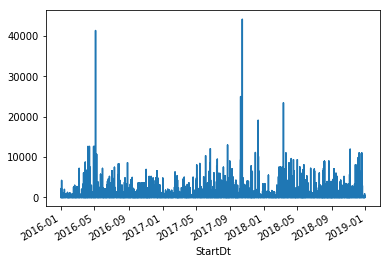

In [4]:
#visualize the sale order quantity which can be taken as the reflection of at once business and get an overview of the data
import matplotlib.pyplot as plt
data.dropna(how = 'any')
data['SaleOrdSizeQty'].plot()
plt.show()
#resample the data by month and take the mean value of each month sale quantity as a representation
data = data.resample(rule = 'm').mean()

In [5]:
#smooth the data by taking its log value
import numpy as np
time_series = data['SaleOrdSizeQty']
type(time_series)

pandas.core.series.Series

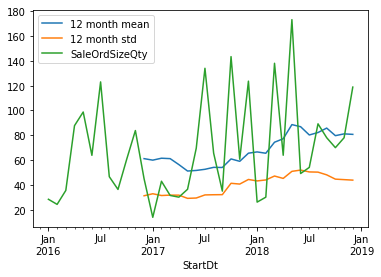

In [6]:
#visualize the result after smoothing
#simultaneously, plot the mean value and standard deviation of the whole time series value to see whether the time series is stationary
time_series.rolling(12).mean().plot(label = '12 month mean')
time_series.rolling(12).std().plot(label = '12 month std')
time_series.plot()
plt.legend()

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
decomp = seasonal_decompose(time_series)

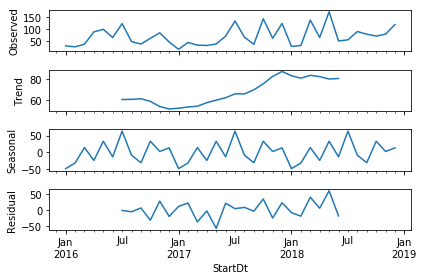

In [9]:
#decompose the time series so as to see its trend and seasonality
fig = decomp.plot()

In [10]:
from statsmodels.tsa.stattools import acf,pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

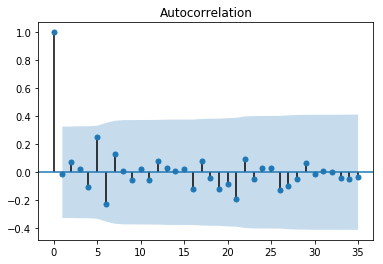

In [11]:
#plot the auto correlation function to determine the order of autoregressive model
acf = plot_acf(time_series)

C:\Users\15527\Anaconda3\envs\tf-gpu\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


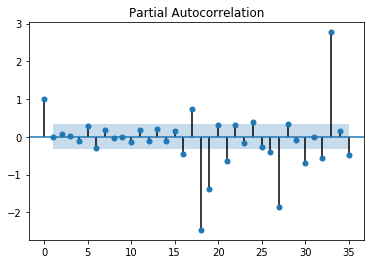

In [12]:
#plot the partial auto correlation function to determine the order of moving average model
pacf = plot_pacf(time_series)

In [13]:
from statsmodels.tsa.stattools import adfuller

In [14]:
#perform adfuller test to double check the time series is stationary
adfuller(time_series)

(-5.776818729460795,
 5.236078759578802e-07,
 0,
 35,
 {'1%': -3.6327426647230316,
  '5%': -2.9485102040816327,
  '10%': -2.6130173469387756},
 262.05294254759195)

In [15]:
#split the time series data into train and test sets by 70% and 30%
size = int(len(time_series)*0.7)
train = time_series[0: size]
test = time_series[size:]

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
#construct ARIMA model, fit and forecast the model depending on train set data, evaluate the model by looking at the mean squared error
history = [i for i in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(2,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

C:\Users\15527\Anaconda3\envs\tf-gpu\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
C:\Users\15527\Anaconda3\envs\tf-gpu\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
C:\Users\15527\Anaconda3\envs\tf-gpu\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future

predicted=77.881074, expected=29.995566
predicted=56.455457, expected=137.992976
predicted=67.925373, expected=63.817212
predicted=71.662122, expected=173.191885
predicted=125.976290, expected=49.067209
predicted=120.451998, expected=54.015459
predicted=94.106280, expected=89.155942
predicted=64.844330, expected=77.957085
predicted=78.287993, expected=69.941704
predicted=82.437078, expected=77.924319
predicted=77.645353, expected=118.784187
Test MSE: 2870.387


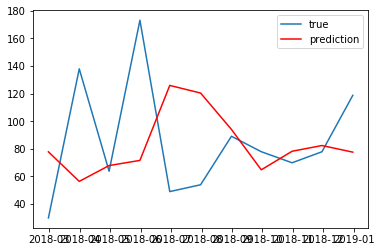

In [18]:
#visualize the prediction and raw value
future_forecast = pd.DataFrame(predictions,index = test.index,columns=['predictions'])
plt.plot(test, label = 'true')
plt.plot(future_forecast, color = 'red', label = 'prediction')
plt.legend()
plt.show()

In [19]:
model.predict(time_series)

array([ 2.82911808e+01,  5.10397586e+01, -1.53190474e+03,  3.74124311e+00,
        4.59017990e+02, -2.11343177e+03, -1.46463270e+03, -1.40842232e+03,
       -4.61691766e+03, -1.43393419e+03, -2.54316389e+02, -1.70445788e+03,
       -1.11905896e+03, -4.82840364e+02, -2.50694956e+02, -1.75240469e+03,
        8.84082455e+02, -1.81120100e+03,  3.67473182e+03, -6.21894187e+03,
        3.75230083e+03, -5.17029144e+03,  7.23642661e+03, -1.30122265e+04,
        1.61150139e+04, -2.73520564e+04,  3.91573100e+04, -5.40039363e+04,
        7.33645515e+04, -1.02647339e+05,  1.36349227e+05, -1.89579852e+05,
        2.62079225e+05, -3.65531365e+05])

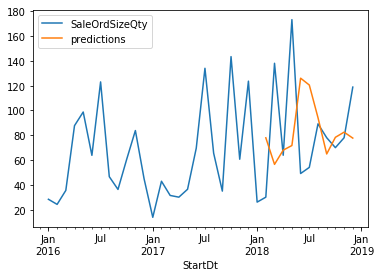

In [20]:
#concat the prediction result to the whole raw time series value
pd.concat([time_series,future_forecast],axis=1).plot()

In [21]:
#model_fit.predict(start = '2019-01-01', end = '2019-12-01')

In [22]:
data.head(5)

,TotalNetPrice,SaleOrdSizeQty,SaleOrdSizeShipQty,CancelledQty
StartDt,,,,
2016-01-31,629.410792,28.291181,24.102162,4.180151
2016-02-29,690.266265,24.183676,20.027627,4.101173
2016-03-31,633.437954,35.442563,34.383853,1.007723
2016-04-30,1282.833997,87.680401,84.440770,3.207238
2016-05-31,1513.636797,98.687026,91.284630,7.361717


In [23]:
Train = pd.DataFrame(train)
Test = pd.DataFrame(test)

In [24]:
#construct a simple artificial intelligence neural netowrk to make prediction
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

Using TensorFlow backend.


Here is the tutorial about how to install TensorFlow with GPU support without installing CUDA:
https://www.pugetsystems.com/labs/hpc/The-Best-Way-to-Install-TensorFlow-with-GPU-Support-on-Windows-10-Without-Installing-CUDA-1187/

In [25]:
#normalize the data
scaler = MinMaxScaler(feature_range=(-1, 1))
train_sc = scaler.fit_transform(Train)
test_sc = scaler.transform(Test)

In [26]:
X_train = train_sc[:-1]
y_train = train_sc[1:]
X_test = test_sc[:-1]
y_test = test_sc[1:]

In [27]:
#construct the neural network system with one input layer with 12 nodes and one output layer
#set the early stopping point if the poss function doesn't improve any mode
#fit the model by train set data
nn_model = Sequential()
nn_model.add(Dense(10, input_dim=1, activation='relu'))
nn_model.add(Dense(1))
nn_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history_neural = nn_model.fit(X_train, y_train, epochs=500, batch_size=1, verbose=1, callbacks=[early_stop], shuffle=False)

Epoch 1/500
24/24 [==============================] - 4s 160ms/step - loss: 0.5347
Epoch 2/500
24/24 [==============================] - 0s 4ms/step - loss: 0.4851
Epoch 3/500
24/24 [==============================] - 0s 4ms/step - loss: 0.4479
Epoch 4/500
24/24 [==============================] - 0s 4ms/step - loss: 0.4189
Epoch 5/500
24/24 [==============================] - 0s 4ms/step - loss: 0.3962
Epoch 6/500
24/24 [==============================] - 0s 4ms/step - loss: 0.3782
Epoch 7/500
24/24 [==============================] - 0s 4ms/step - loss: 0.3638
Epoch 8/500
24/24 [==============================] - 0s 4ms/step - loss: 0.3533
Epoch 9/500
24/24 [==============================] - 0s 3ms/step - loss: 0.3457
Epoch 10/500
24/24 [==============================] - 0s 4ms/step - loss: 0.3395
Epoch 11/500
24/24 [==============================] - 0s 4ms/step - loss: 0.3346
Epoch 12/500
24/24 [==============================] - 0s 4ms/step - loss: 0.3309
Epoch 13/500
24/24 [===============

Epoch 102/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2756
Epoch 103/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2752
Epoch 104/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2749
Epoch 105/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2746
Epoch 106/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2743
Epoch 107/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2740
Epoch 108/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2737
Epoch 109/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2734
Epoch 110/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2731
Epoch 111/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2728
Epoch 112/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2725
Epoch 113/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2722
Epoch 114/500
24

24/24 [==============================] - 0s 4ms/step - loss: 0.2538
Epoch 301/500
24/24 [==============================] - 0s 3ms/step - loss: 0.2538
Epoch 302/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2537
Epoch 303/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2536
Epoch 304/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2536
Epoch 305/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2536
Epoch 306/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2535
Epoch 307/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2535
Epoch 308/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2535
Epoch 309/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2534
Epoch 310/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2533
Epoch 311/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2533
Epoch 312/500
24/24 [=========

24/24 [==============================] - 0s 4ms/step - loss: 0.2503
Epoch 401/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2503
Epoch 402/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 403/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 404/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 405/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2502
Epoch 406/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2501
Epoch 407/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2501
Epoch 408/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2501
Epoch 409/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2500
Epoch 410/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2500
Epoch 411/500
24/24 [==============================] - 0s 4ms/step - loss: 0.2500
Epoch 412/500
24/24 [=========

In [28]:
#evaluate the model
nn_test_mse = nn_model.evaluate(X_test, y_test, batch_size=1)
print('NN: %f'%nn_test_mse)

10/10 [==============================] - 0s 6ms/step
NN: 0.425151


In [29]:
#calculate the mean squared error
y_pred_test_nn = nn_model.predict(X_test)
error= mean_squared_error(y_test, y_pred_test_nn)
error

0.42515144619299094

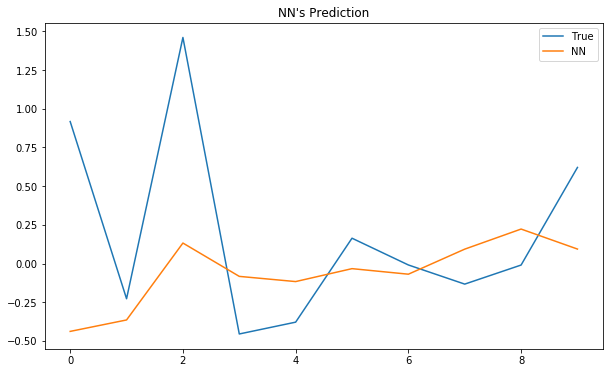

In [30]:
#visualize the prediction
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True')
plt.plot(y_pred_test_nn, label='NN')
plt.title("NN's Prediction")
plt.legend()

In [31]:
#use 2019 at once data to test the quality of nn model
df_2019 = pd.read_csv('2019 At Once Data.csv')
df_2019.head()

,MarketChannelDesc,SalesTypeCd,SaleOrdDetCreatedDt,StartDt,ProductDivision,ERPMasterGender,ReportingBusinessUnit,TotalNetPrice,SaleOrdSizeQty,CancelledQty,SaleOrdSizeShipQty
0,FIELD,CL,2018-10-05 00:00:00,2019-01-01 00:00:00,Footwear,MNS,Run/Train/Fit,126241.5,3279,3279,0
1,FIELD,CL,2018-10-05 00:00:00,2019-01-01 00:00:00,Footwear,MNS,Sportstyle Prime / Select,32301.5,839,839,0
2,INTERNET,WS,2018-10-09 00:00:00,2019-01-03 00:00:00,Footwear,KIDS,Sportstyle Core / Kids,3480.0,116,43,73
3,FIELD,WS,2018-10-12 00:00:00,2019-01-01 00:00:00,Footwear,MNS,Sportstyle Prime / Select,37022.4,720,0,720
4,SHOE CHAIN,WS,2018-10-12 00:00:00,2019-01-01 00:00:00,Footwear,MNS,Run/Train/Fit,6885.0,204,204,0


In [32]:
df_2019.dropna(how = 'any')

,MarketChannelDesc,SalesTypeCd,SaleOrdDetCreatedDt,StartDt,ProductDivision,ERPMasterGender,ReportingBusinessUnit,TotalNetPrice,SaleOrdSizeQty,CancelledQty,SaleOrdSizeShipQty
0,FIELD,CL,2018-10-05 00:00:00,2019-01-01 00:00:00,Footwear,MNS,Run/Train/Fit,126241.50,3279,3279,0
1,FIELD,CL,2018-10-05 00:00:00,2019-01-01 00:00:00,Footwear,MNS,Sportstyle Prime / Select,32301.50,839,839,0
2,INTERNET,WS,2018-10-09 00:00:00,2019-01-03 00:00:00,Footwear,KIDS,Sportstyle Core / Kids,3480.00,116,43,73
3,FIELD,WS,2018-10-12 00:00:00,2019-01-01 00:00:00,Footwear,MNS,Sportstyle Prime / Select,37022.40,720,0,720
4,SHOE CHAIN,WS,2018-10-12 00:00:00,2019-01-01 00:00:00,Footwear,MNS,Run/Train/Fit,6885.00,204,204,0
5,SHOE CHAIN,WS,2018-10-16 00:00:00,2019-01-01 00:00:00,Footwear,MNS,Run/Train/Fit,8505.00,252,0,252
6,FIELD,WS,2018-10-16 00:00:00,2019-01-10 00:00:00,Footwear,MNS,Sportstyle Prime / Select,11088.00,168,168,0
7,SHOE CHAIN,WS,2018-10-18 00:00:00,2019-01-07 00:00:00,Footwear,MNS,Run/Train/Fit,57130.00,1970,1968,0
8,SPORT SPECIALTY,WS,2018-10-19 00:00:00,2019-01-01 00:00:00,Footwear,KIDS,Teamsport,495.00,22,2,20
9,SPORT SPECIALTY,WS,2018-10-19 00:00:00,2019-01-01 00:00:00,Footwear,MNS,Teamsport,2574.00,32,0,32


In [33]:
#change the data form to datetime and set it as the index
df_2019['StartDt'] = pd.to_datetime(df_2019['StartDt'])
df_2019.set_index('StartDt', inplace= True)

In [34]:
#resample the data and use the mean value of each month as the target variable
data_2019 = df_2019.resample(rule = 'm').mean()

In [35]:
#store data in the time series
time_series_2019 = data_2019['SaleOrdSizeQty']
time_series_2019.dropna(how = 'any')

StartDt
2019-01-31     395.084702
2019-02-28    1641.580975
2019-03-31    1495.510397
Freq: M, Name: SaleOrdSizeQty, dtype: float64

In [37]:
#calculate the mean squared error
pred_2019 = nn_model.predict(time_series_2019)
error_2019 = mean_squared_error(time_series_2019, abs(pred_2019))
error

0.42515144619299094

In [38]:
pred_2019_nn = pd.DataFrame(pred_2019, index = time_series_2019.index)

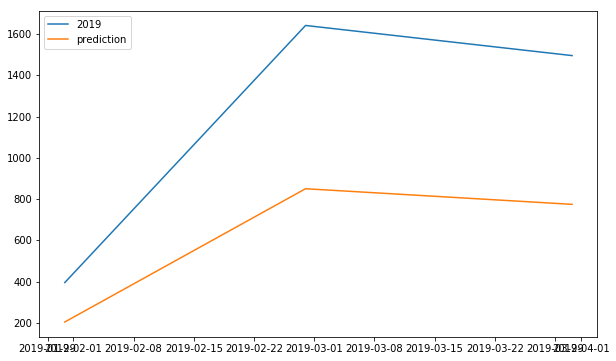

In [39]:
#visualize the result
plt.figure(figsize=(10, 6))
plt.plot(time_series_2019, label='2019')
plt.plot(abs(pred_2019_nn), label = 'prediction')
plt.legend()

# Cheng's Part

In [ ]:
import pandas as pd
import numpy as np
import time
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

Here is the tutorial about how to install the necessary package---pytorch
https://medium.com/@bryant.kou/how-to-install-pytorch-on-windows-step-by-step-cc4d004adb2a

In [ ]:
df=pd.read_table('Northeastern Spring 2019 - At Once Data Set.txt')
df19=pd.read_csv('2019 At Once Data.csv')

In [ ]:
df_copy=df.copy()
df_copy['StartDt']=pd.to_datetime(df_copy['StartDt'])
df_copy.set_index(['StartDt'],inplace=True)
ordersize=df_copy['SaleOrdSizeQty'].resample('M').sum()
##########
df19_copy=df19.copy()
df19_copy['StartDt']=pd.to_datetime(df19_copy['StartDt'])
df19_copy.set_index(['StartDt'],inplace=True)
ordersize19=df19_copy['SaleOrdSizeQty'].resample('M').sum()
print(ordersize)
print(ordersize19)

In [ ]:
grouped=df['SaleOrdSizeQty'].groupby(df['StartDt'])
df1=grouped.mean()
plt.scatter(np.arange(1096),df1)
plt.show()

In [ ]:
x=torch.unsqueeze(torch.linspace(0,36,36),dim=1)
x=Variable(x.float())
x2019=torch.unsqueeze(torch.linspace(36,39,3),dim=1)

In [ ]:
y=torch.unsqueeze(torch.from_numpy(np.array(ordersize)),dim=1)
y=Variable(y.float())

In [ ]:
class Net(torch.nn.Module):
    def __init__(self,n_feature,n_node,n_result):
        super(Net,self).__init__()
        self.hidden1=torch.nn.Linear(n_feature,n_node)
        self.hidden2=torch.nn.Linear(n_node,n_node)
        self.predict=torch.nn.Linear(n_node,n_result)
    
    def forward(self,x):
        x=F.relu(self.hidden1(x))
        x=F.relu(self.hidden2(x))
        x=self.predict(x)
        return x 

In [ ]:
Net
net=Net(1,10,1)
optimizer=torch.optim.Adam(net.parameters(),lr=0.1,betas=(0.9,0.99))
loss_func=torch.nn.MSELoss()
for t in range(100):
    prediction=net(x)
    loss=loss_func(prediction,y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 1500000, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

    plt.ioff()
    plt.show()

In [ ]:
net(x2019)

In [ ]:
plt.plot(['Jau','Feb','Mar'],[1180200,1226900,1273600],label='prediction')
plt.plot(['Jau','Feb','Mar'],ordersize19,label='True')
plt.legend()
plt.show()

In [ ]:
def mse(a,b):
    return np.sqrt(((b-a)**2).mean())

In [ ]:
(mse(ordersize19,[1180200,1226900,1273600]))/30